# Logits e argmax
Para cada um dos datasets:
Passar o dataset pelos 2 modelos e concatenar seus logits em uma lista e depois aplicar a softmax

In [87]:
def get_logits(models, dataloader, device):
    # for model in models:
    model1 = models[0].to(device)
    model2 = models[1].to(device)
    model3 = models[2].to(device)
    
    model1.eval()
    model2.eval()
    model3.eval()
    logits = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs1 = model1(inputs).detach().cpu().numpy()
            outputs2 = model2(inputs).detach().cpu().numpy()
            outputs3 = model3(inputs).detach().cpu().numpy()
            
            # Concatenate the outputs along the correct dimension
            combined_outputs = np.concatenate((outputs1, outputs2, outputs3), axis=1)
            
            logits.append(combined_outputs)
    
    return np.concatenate(logits, axis=0)

In [175]:
models = [model_mnist , model_svhn, model_combined]
combined_logits = get_logits((models), test_combined_dataloader, device)
combined_logits.shape

(36032, 30)

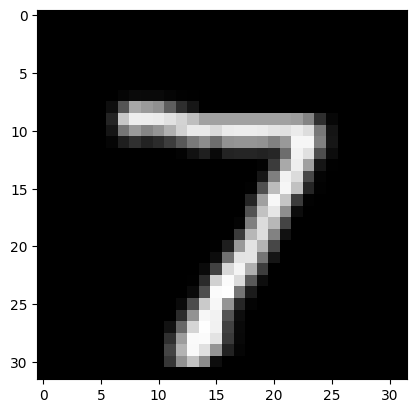


fazendo argmax do mnist
[ -6.5635552  -1.8201514  -3.5198343  -1.6971519   3.942061   -5.0733905
 -12.52026    26.673439   -6.007456    2.3884196] 7

fazendo argmax do svhn
[-2.8570375  -0.56708866 -5.8099236   2.0956542  -2.0594065  -3.9255009
 -2.8114336  17.056015   -6.564337    8.311277  ] 7

fazendo argmax do combined
[-11.225965   -0.3550372 -14.293932   -6.979712   -4.2555094 -15.430385
 -19.447308   20.09267   -14.364584    2.294392 ] 7

logits combinados
[ -6.56396     -1.8190225   -3.520609    -1.6979444    3.943133
  -5.073531   -12.519203    26.672615    -6.008079     2.3886979
  -2.856429    -0.56715304  -5.80794      2.0949895   -2.0595999
  -3.927878    -2.8107533   17.056273    -6.5645094    8.310839
 -11.22424     -0.3547328  -14.293362    -6.9770966   -4.2523475
 -15.428565   -19.446152    20.089876   -14.362683     2.2944524 ]


In [93]:
inputs, labels = test_dataset_combined[0]
inputs = inputs.to(device)
imshow(inputs.cpu())
argmax_mnist = model_mnist(inputs.unsqueeze(0)).detach().cpu().numpy().squeeze(0)
argmax_svhn = model_svhn(inputs.unsqueeze(0)).detach().cpu().numpy().squeeze(0)
argmax_combined = model_combined(inputs.unsqueeze(0)).detach().cpu().numpy().squeeze(0)

print("\nfazendo argmax do mnist")
print(argmax_mnist, argmax_mnist.argmax())

print("\nfazendo argmax do svhn")
print(argmax_svhn, argmax_svhn.argmax())

print("\nfazendo argmax do combined")
print(argmax_combined, argmax_combined.argmax())

print("\nlogits combinados")
print(combined_logits[0])

In [94]:
def test_logits(combined_logits, test_dataset_combined):
    acertos = 0
    acertos_mnist = 0
    attempt_mnist = 0
    acertos_svhn = 0
    attempt_svhn = 0

    total = len(combined_logits)
    # total = 60000 # len of train_dataset_mnist
    # total = 60000 + 73257
    
    # Aqui pelo que entendi
    # Vejo qual modelo esta mais confiante para fazer a previsao, 
    # Entao contabilizo uma tentativa para o modelo e verifico se a previsao foi correta
    for i, (inputs, targets) in enumerate(test_dataset_combined):#100): 
        argmax = np.argmax(combined_logits[i])
        answered = 'mnist'
        if argmax >= 10:
            attempt_svhn += 1
            argmax -= 10
            answered = 'svhn'
        else:
            attempt_mnist += 1

        if argmax == targets:
            acertos += 1
            if answered == 'svhn':
                acertos_svhn += 1
            else:
                acertos_mnist += 1
        
    print(f'Overall Accuracy: {acertos}/{total} = {100 * (acertos / total):.2f}%')
    print(f'MNIST Accuracy: {acertos_mnist}, MNIST Attempt: {attempt_mnist} ')
    print(f'SVHN Accuracy: {acertos_svhn}, SVHN Attempt: {attempt_svhn}')
    print(f'Combined Accuracy: {acertos_combined}, SVHN Attempt: {attempt_combined}')

test_logits(combined_logits, test_dataset_combined)

Overall Accuracy: 32557/36032 = 90.36%
MNIST Accuracy: 7087, MNIST Attempt: 7117 
SVHN Accuracy: 25470, SVHN Attempt: 28915
Combined Accuracy: 0, SVHN Attempt: 0
